In [29]:
import numpy
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import fastf1
import fastf1.plotting
import csv
import os
import sys
from pathlib import Path

In [31]:
root_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Add it to Python's search path if it's not already there
if root_path not in sys.path:
    sys.path.append(root_path)

# Now Python can see 'Utilities'
from Utilities.CornerUtils import CircuitAnalyzer

In [2]:
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/plotting/_plotting.py:57: FutureWarning: The `misc_mpl_mods` argument was dropped from `.setup_mpl()` in version 3.6.0 and has no effect anymore. It will be removed in a future version of FastF1.
  warnings.warn(


In [3]:
# Load the Race session for Las Vegas 2025.

print("Loading session data...")
session = fastf1.get_session(2025, "Las Vegas", "R")
session.load()
print("Session loaded.")

req         WARNING 	DEFAULT CACHE ENABLED! (103.8 MB) /home/moreno/.cache/fastf1
core           INFO 	Loading data for Las Vegas Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '63'


Loading session data...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '12', '16', '55', '6', '27', '44', '31', '87', '14', '22', '10', '30', '43', '23', '5', '18', '4', '81']


Session loaded.


In [4]:
# Mapping specific team names to the requested hex codes.

team_colors = {
    "Mercedes": "#00D7B6",
    "Red Bull Racing": "#4781D7",
    "Ferrari": "#ED1131",
    "McLaren": "#F47600",
    "Alpine": "#00A1E8",
    "Racing Bulls": "#6C98FF",
    "RB": "#6C98FF",             # Fallback
    "Aston Martin": "#229971",
    "Williams": "#1868DB",
    "Kick Sauber": "#01C00E",
    "Sauber": "#01C00E",         # Fallback
    "Haas": "#9C9FA2"
}

In [5]:
# Extract detailed telemetry for every driver and save to individual files.

print("Processing telemetry files...")
out_dir = Path("./telemetry_lasvegas_2025")
out_dir.mkdir(parents=True, exist_ok=True)

for drv in session.drivers:
    driver_info = session.get_driver(drv)
    name = driver_info["Abbreviation"]
    
    # Select all laps for this driver
    driver_laps = session.laps.pick_driver(drv)

    if driver_laps.empty:
        continue

    # Initialize empty DataFrame
    full_tel = pd.DataFrame()
    
    # Iterate laps and append telemetry
    # We use iterlaps() to safely get telemetry for each lap individually
    for _, lap in driver_laps.iterlaps():
        try:
            tel = lap.get_telemetry()
            tel["LapNumber"] = lap["LapNumber"]
            tel["Driver"] = name
            full_tel = pd.concat([full_tel, tel], ignore_index=True)
        except Exception:
            continue

    # Save CSV
    if not full_tel.empty:
        file_path = out_dir / f"{name}_LV2025_Race_Telemetry.csv"
        full_tel.to_csv(file_path, index=False)
        print(f"Saved telemetry for {name}")

print("All telemetry files saved.")

/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Processing telemetry files...
Saved telemetry for VER


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Saved telemetry for RUS


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Saved telemetry for ANT


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Saved telemetry for LEC


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Saved telemetry for SAI


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Saved telemetry for HAD


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Saved telemetry for HUL


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Saved telemetry for HAM


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Saved telemetry for OCO


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Saved telemetry for BEA


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Saved telemetry for ALO


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Saved telemetry for TSU


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Saved telemetry for GAS


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Saved telemetry for LAW


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Saved telemetry for COL


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Saved telemetry for ALB


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Saved telemetry for BOR
Saved telemetry for STR


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Saved telemetry for NOR


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Saved telemetry for PIA
All telemetry files saved.


Generating boxplot...


/tmp/ipykernel_50187/750460218.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Boxplot saved successfully.


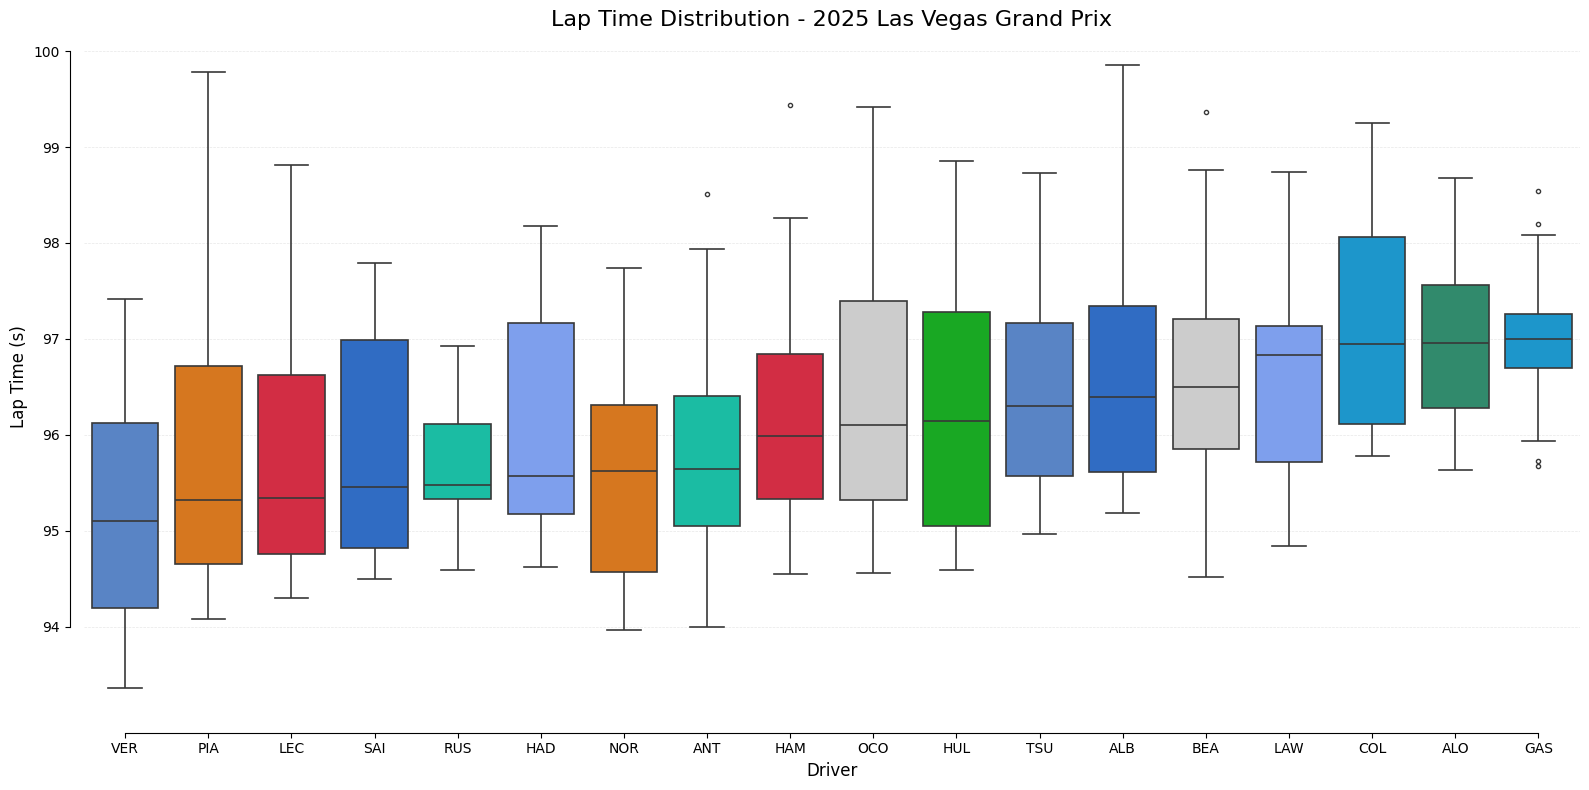

In [7]:

print("Generating boxplot...")

# 1. Filter data (Quick laps + No Pit In/Out)
# We use the session object you loaded in the previous step
laps_for_plot = session.laps.pick_quicklaps().pick_wo_box()

# 2. Prepare data
laps_for_plot['LapTimeSeconds'] = laps_for_plot['LapTime'].dt.total_seconds()

# 3. Sort drivers by median pace (Fastest on left)
driver_order = laps_for_plot.groupby('Driver')['LapTimeSeconds'].median().sort_values().index

# 4. Map colors
# Ensure team_colors dictionary is available from previous cell
driver_team_mapping = laps_for_plot[['Driver', 'Team']].drop_duplicates().set_index('Driver')['Team'].to_dict()
driver_palette = {driver: team_colors.get(team, '#CCCCCC') for driver, team in driver_team_mapping.items()}

# 5. Create Plot
plt.figure(figsize=(16, 8))

sns.boxplot(
    data=laps_for_plot,
    x='Driver',
    y='LapTimeSeconds',
    order=driver_order,
    palette=driver_palette,
    whis=1.5,
    fliersize=3,
    linewidth=1.2
)

# 6. Style and Save
plt.title(f"Lap Time Distribution - {session.event.year} {session.event.EventName}", fontsize=16)
plt.xlabel("Driver", fontsize=12)
plt.ylabel("Lap Time (s)", fontsize=12)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, alpha=0.3)
sns.despine(offset=10, trim=True)

plt.tight_layout()
plt.savefig("LasVegas2025_LapTimes.png", dpi=300)
print("Boxplot saved successfully.")
plt.show()

Calculating Turn 7 braking distances...
Turn 7 Distance: 2024.6m


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.wa

KeyError: 'LapNumber'

<Figure size 1800x900 with 0 Axes>

Calculating Turn 5 braking distances...
Turn 5 Distance: 1539.6m


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.wa

Braking distance data calculated.


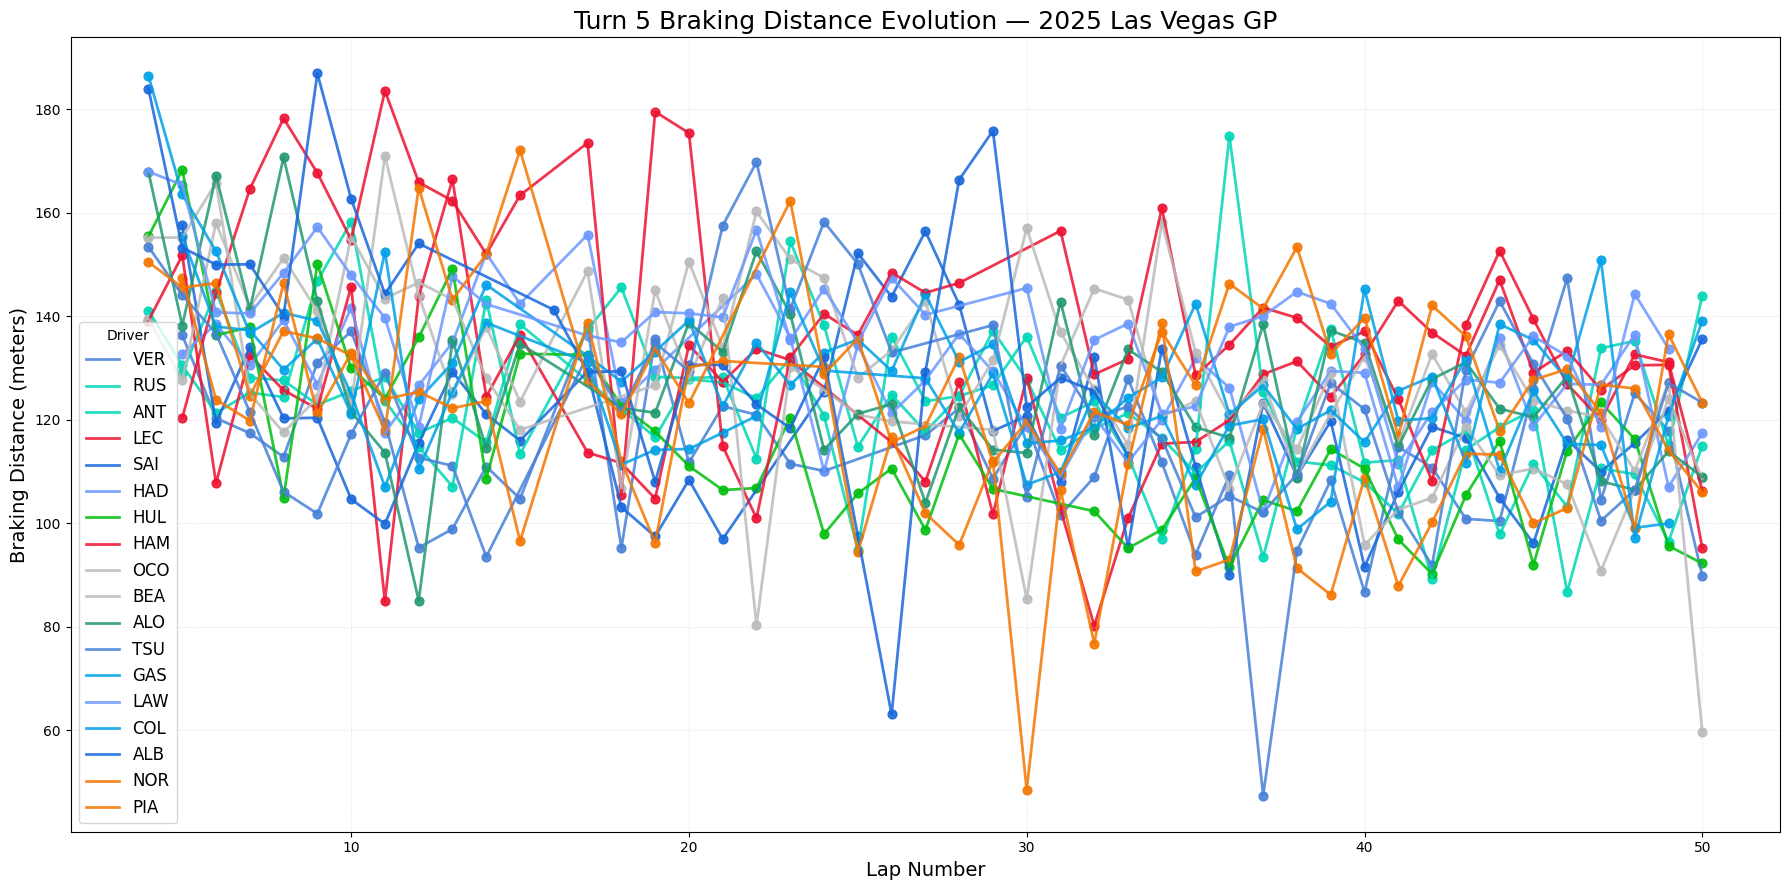

In [20]:
print("Calculating Turn 5 braking distances...")

# 1. Get Turn 5 Location
circuit_info = session.get_circuit_info()
turn_5_dist = circuit_info.corners.loc[circuit_info.corners['Number'] == 5, 'Distance'].values[0]
print(f"Turn 5 Distance: {turn_5_dist:.1f}m")

# Define the search window around T5
start_window = turn_5_dist - 200
end_window = turn_5_dist + 50

# 2. Filter Laps (Quick laps without pit stops)
laps_to_analyze = session.laps.pick_quicklaps().pick_wo_box()

# 3. Collect braking data
braking_data = []

for drv in session.drivers:
    drv_laps = laps_to_analyze.pick_driver(drv)
    if drv_laps.empty:
        continue

    driver_code = session.get_driver(drv)['Abbreviation']
    team_name = drv_laps.iloc[0]['Team']
    
    for _, lap in drv_laps.iterlaps():
        try:
            car_data = lap.get_car_data().add_distance()

            # Only analyze region near Turn 5
            zone = car_data.loc[
                (car_data['Distance'] > start_window) &
                (car_data['Distance'] < end_window)
            ]

            # Find braking points
            braking_frames = zone[zone['Brake'] >= 1]

            if not braking_frames.empty:
                b_dist = braking_frames['Distance'].max() - braking_frames['Distance'].min()

                # Reasonable braking distances only
                if 10 < b_dist < 200:
                    braking_data.append({
                        'Driver': driver_code,
                        'Team': team_name,
                        'BrakingDistance': b_dist,
                        'LapNumber': lap['LapNumber']
                    })
        except Exception:
            continue

# Convert to DataFrame
braking_df = pd.DataFrame(braking_data)
print("Braking distance data calculated.")
driver_colors = {}
for drv in braking_df['Driver'].unique():
    team = braking_df[braking_df['Driver'] == drv]['Team'].iloc[0]
    color = team_colors.get(team, "#BBBBBB")  # fallback color
    driver_colors[drv] = color

plt.figure(figsize=(18, 9))

# Plot each driver individually for full control over colors
for drv in braking_df['Driver'].unique():
    df_drv = braking_df[braking_df['Driver'] == drv]
    color = driver_colors[drv]

    # Line plot
    plt.plot(
        df_drv["LapNumber"],
        df_drv["BrakingDistance"],
        label=drv,
        color=color,
        linewidth=2,
        alpha=0.85
    )

    # Scatter plot on top
    plt.scatter(
        df_drv["LapNumber"],
        df_drv["BrakingDistance"],
        color=color,
        s=40,
        alpha=0.9
    )

plt.title(
    f"Turn 5 Braking Distance Evolution — {session.event.year} Las Vegas GP",
    fontsize=18
)
plt.xlabel("Lap Number", fontsize=14)
plt.ylabel("Braking Distance (meters)", fontsize=14)

plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.3)
plt.legend(title="Driver", fontsize=12)
plt.tight_layout()

plt.savefig("LasVegas2025_T5_Braking_Evolution_TeamColors.png", dpi=300)
plt.show()

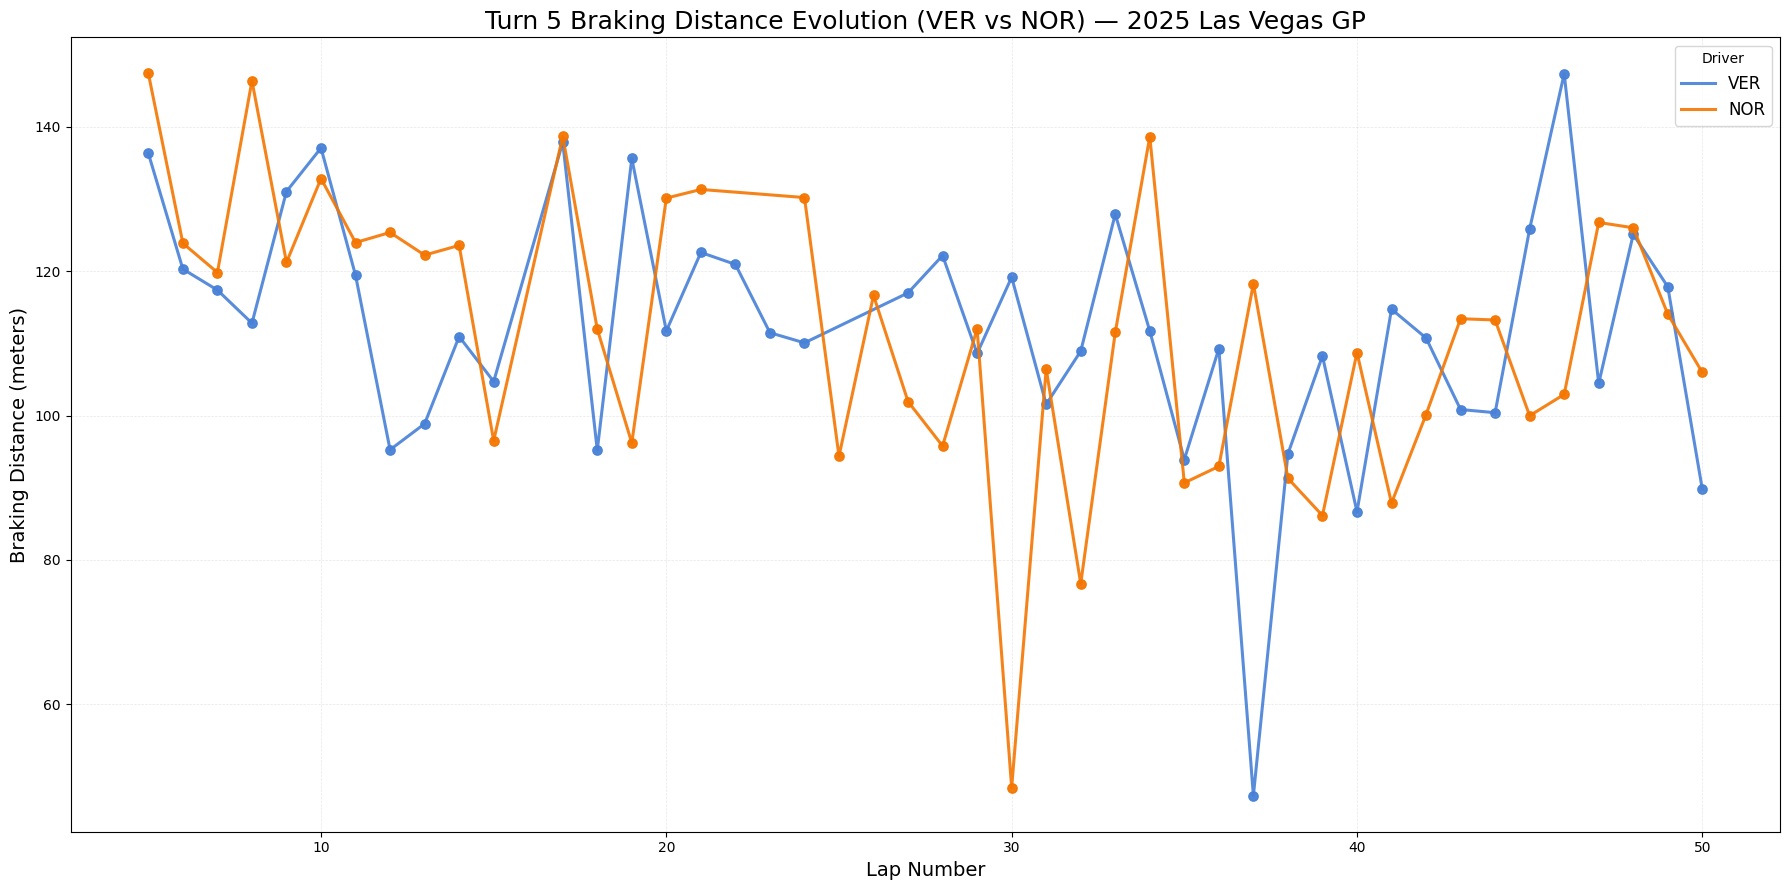

In [21]:
target_drivers = ["VER", "NOR"]

plt.figure(figsize=(18, 9))

for drv in target_drivers:
    df_drv = braking_df[braking_df['Driver'] == drv]
    if df_drv.empty:
        continue

    team = df_drv['Team'].iloc[0]
    color = team_colors.get(team, "#BBBBBB")

    # Line plot
    plt.plot(
        df_drv["LapNumber"],
        df_drv["BrakingDistance"],
        label=drv,
        color=color,
        linewidth=2.2,
        alpha=0.9
    )

    # Scatter plot
    plt.scatter(
        df_drv["LapNumber"],
        df_drv["BrakingDistance"],
        color=color,
        s=45,
        alpha=0.95
    )

plt.title(
    f"Turn 5 Braking Distance Evolution (VER vs NOR) — {session.event.year} Las Vegas GP",
    fontsize=18
)
plt.xlabel("Lap Number", fontsize=14)
plt.ylabel("Braking Distance (meters)", fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.3)
plt.legend(title="Driver", fontsize=12)
plt.tight_layout()

plt.savefig("LasVegas2025_T5_Braking_Evolution_VER_vs_NOR.png", dpi=300)
plt.show()

In [22]:
braking_df.to_csv("LasVegas2025_T5_Braking_Distances.csv", index=False)
print("Braking distance data saved to CSV.")

Braking distance data saved to CSV.


Generating braking distance boxplot...


/tmp/ipykernel_50187/3197461125.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


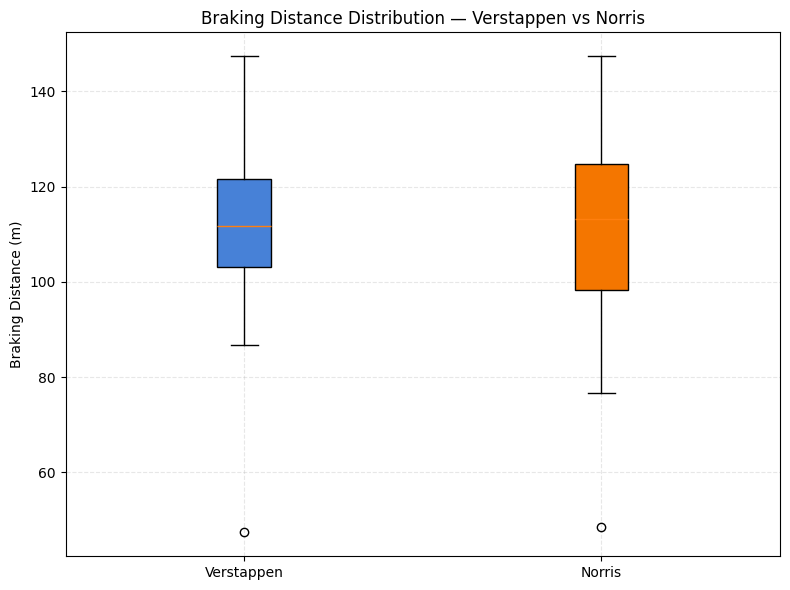

In [23]:
print("Generating braking distance boxplot...")
# Drivers we want
drivers = ["VER", "NOR"]

# Filter the dataset
df_two = braking_df[braking_df["Driver"].isin(drivers)]

# Get colors
colors = [team_colors[df_two[df_two["Driver"] == d]["Team"].iloc[0]] for d in drivers]

plt.figure(figsize=(8, 6))

# Create boxplot using BrakingDistance
box = plt.boxplot(
    [df_two[df_two["Driver"] == d]["BrakingDistance"] for d in drivers],
    labels=["Verstappen", "Norris"],
    patch_artist=True
)

# Apply team colors
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title("Braking Distance Distribution — Verstappen vs Norris")
plt.ylabel("Braking Distance (m)")
plt.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


In [32]:
Corner = CircuitAnalyzer(session, team_colors)

Initializing CircuitAnalyzer: Pre-filtering laps...


Analyzing Braking Distance for Turn 5...


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.wa

Plot saved to Analysis_T5_Braking.png


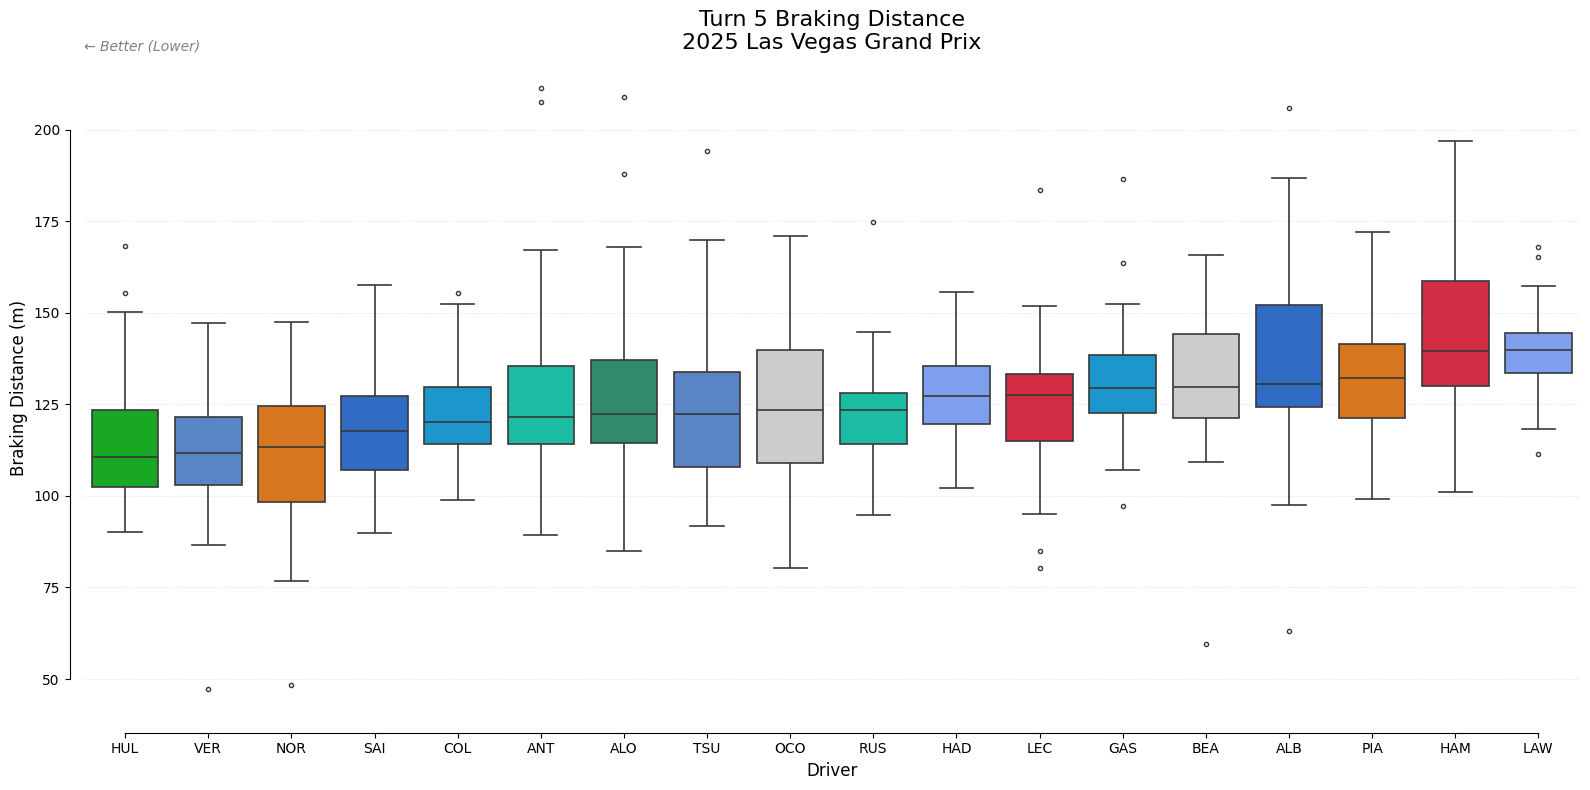

In [33]:
Corner.entry.braking_dist(5)

Analyzing Exit Velocity for Turn 5 (+100m)...


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.wa

Plot saved to Analysis_T5_ExitSpeed.png


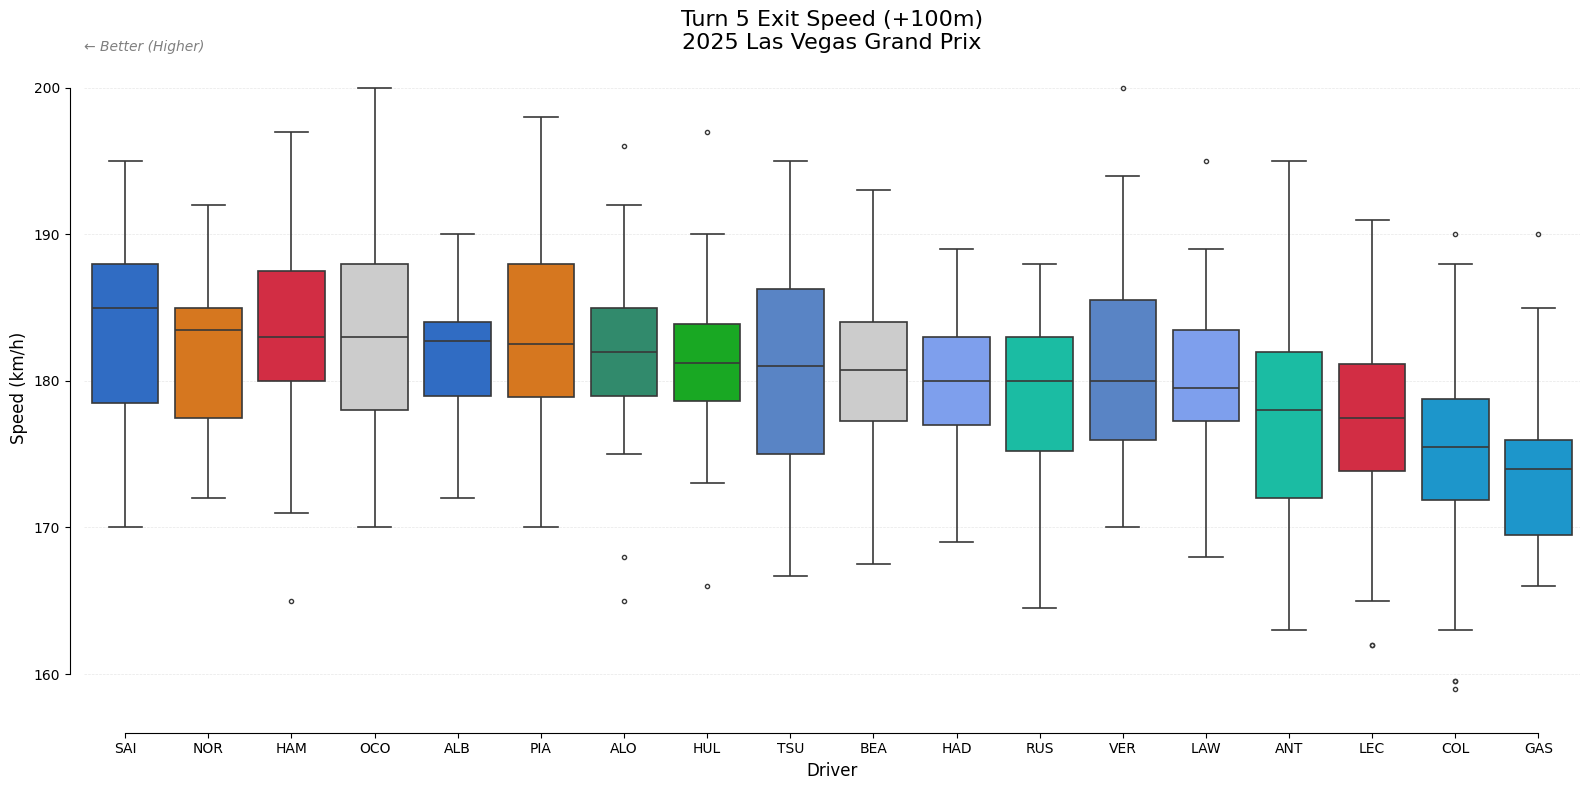

In [35]:
Corner.exit.velo_dist(5)